In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv(r"D:\Download\nba_2013.csv")

In [4]:
df.head()

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  x3p  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468    4   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503    0   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520    0   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  128   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546    0   

   x3pa      x3p.  x2p  x2pa      x2p.   efg.   ft  fta    ft.  orb  drb  trb  \
0    15  0.266667   62   126  0.492063  0.482   35   53  0.660   72  144  216   
1     0       NaN   93   185  0.502703  0.503   79  136  0.581  142  190  332   
2     0       NaN  143   275  0.520000  0.520   76  119  0.639  102  204  306   
3   300  0.426667  336   711  0.472574  0.522  274  336  0.815   32  230  262   
4     1  0.000000  136   248  0.548387  0.546   56   67  0.836   94  183  277   

   ast  stl  blk  tov   pf   pts     season  season_end  
0   28   23   26   30  122   171  2013-2014        2013  
1   43   40   57   71  203   265  2013-2014        2013  
2   38   24   36   39  108   362  2013-2014        2013  
3  248   35    3  146  136  1330  2013-2014        2013  
4   40   23   46   63  187   328  2013-2014        2013

# columns description

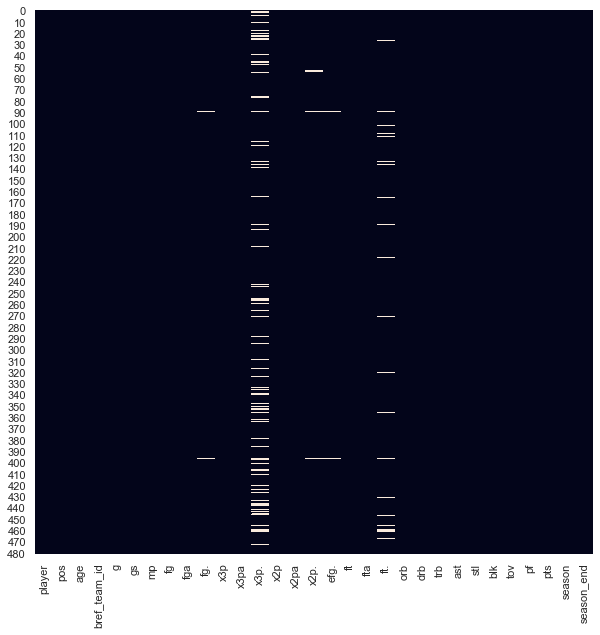

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [6]:
miss_1=df[df["x3p."].isnull()].index
miss_2=df[df["x2p."].isnull()].index

In [7]:
miss_2

Int64Index([54, 90, 397], dtype='int64')

In [8]:
df.iloc[df.index[miss_1]][["x3p","x3pa","x3p."]]

x3p  x3pa  x3p.
1      0     0   NaN
2      0     0   NaN
5      0     0   NaN
11     0     0   NaN
18     0     0   NaN
21     0     0   NaN
23     0     0   NaN
25     0     0   NaN
26     0     0   NaN
39     0     0   NaN
46     0     0   NaN
48     0     0   NaN
55     0     0   NaN
77     0     0   NaN
90     0     0   NaN
116    0     0   NaN
120    0     0   NaN
134    0     0   NaN
137    0     0   NaN
139    0     0   NaN
165    0     0   NaN
190    0     0   NaN
194    0     0   NaN
209    0     0   NaN
243    0     0   NaN
245    0     0   NaN
255    0     0   NaN
256    0     0   NaN
257    0     0   NaN
260    0     0   NaN
266    0     0   NaN
271    0     0   NaN
289    0     0   NaN
295    0     0   NaN
309    0     0   NaN
317    0     0   NaN
324    0     0   NaN
334    0     0   NaN
336    0     0   NaN
339    0     0   NaN
340    0     0   NaN
348    0     0   NaN
351    0     0   NaN
353    0     0   NaN
356    0     0   NaN
362    0     0   NaN
364    0     0   NaN
379    0     0   NaN
386    0     0   NaN
397    0     0   NaN
398    0     0   NaN
401    0     0   NaN
407    0     0   NaN
411    0     0   NaN
421    0     0   NaN
424    0     0   NaN
427    0     0   NaN
434    0     0   NaN
437    0     0   NaN
438    0     0   NaN
442    0     0   NaN
444    0     0   NaN
446    0     0   NaN
456    0     0   NaN
460    0     0   NaN
461    0     0   NaN
473    0     0   NaN

In [9]:
df.iloc[df.index[miss_2]][["ft","fta","ft."]]

ft  fta  ft.
54    3    3  1.0
90    0    0  NaN
397   0    0  NaN

# top 10 players with most points in the season

In [10]:
top_index=df["pts"].sort_values(ascending=False).index[:10]

In [11]:
dF_top_players=df.iloc[top_index][["player","pts"]]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

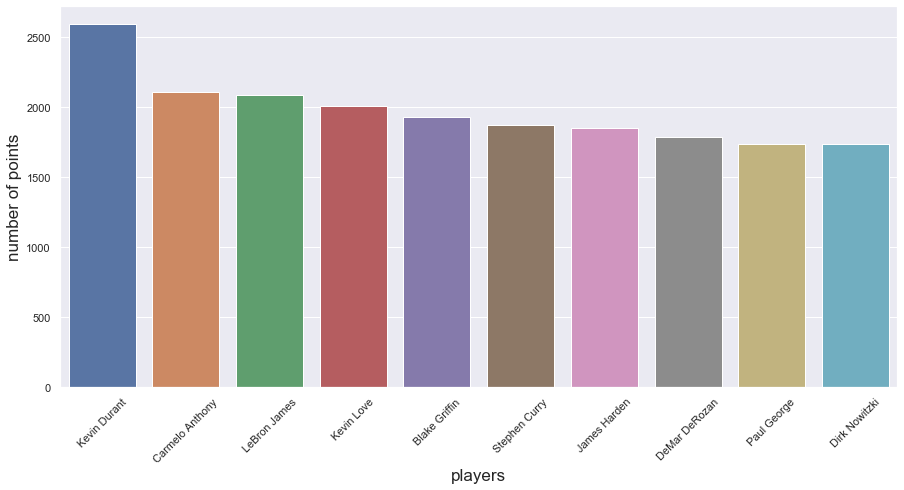

In [12]:
plt.figure(figsize=(15,7))
sns.barplot(x=dF_top_players["player"],y=dF_top_players["pts"])
plt.xlabel("players",fontsize=17)
plt.ylabel("number of points",fontsize=17)
plt.xticks(rotation=45)

In [13]:
df["pos"].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

Text(0.5, 1.0, 'FIELD GOALS VS FIELD GOALS ATTEMPTS')

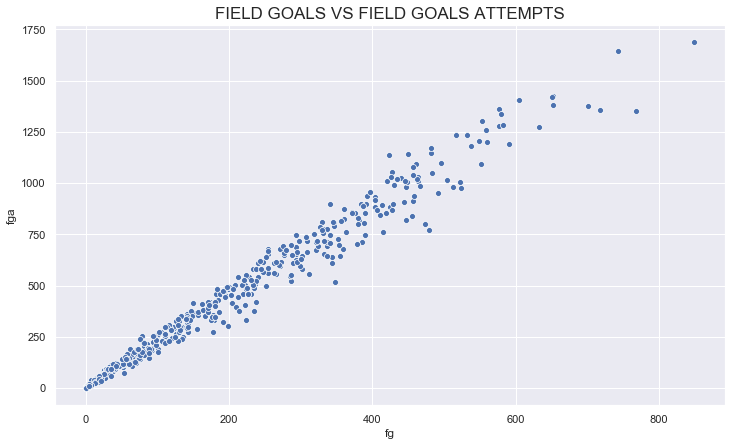

In [14]:

plt.figure(figsize=(12,7))
sns.scatterplot(df["fg"],df["fga"])
plt.title("FIELD GOALS VS FIELD GOALS ATTEMPTS",fontsize=17)

As you can see in the above scatterplot there is a strong positive linear relation between the field goals and field goals attempts which shows that more the number of attempts more the number of 3 pointers

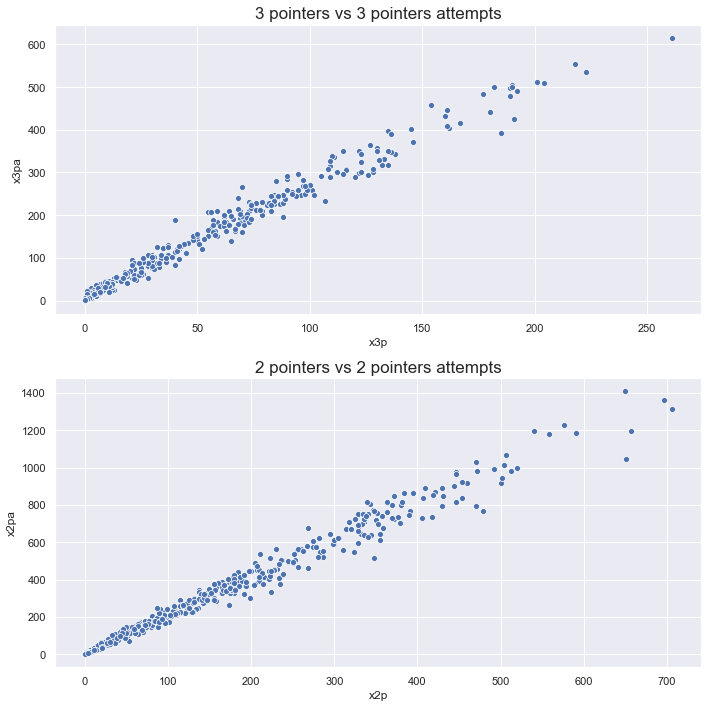

In [15]:
f, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.set_title("3 pointers vs 3 pointers attempts",fontsize=17)
ax2.set_title("2 pointers vs 2 pointers attempts",fontsize=17)
sns.scatterplot(df["x3p"], df["x3pa"], ax=ax1)
sns.scatterplot(df["x2p"],df["x2pa"], ax=ax2)
plt.tight_layout()

### most number of three pointers by players

In [16]:
df_3_pointers=df[["x3p","player"]].sort_values(by="x3p",ascending=False)[:10]
df_3_pointers

x3p           player
110  261    Stephen Curry
428  223    Klay Thompson
272  218   Damian Lillard
176  204     Gerald Green
288  201  Wesley Matthews
133  192     Kevin Durant
80   191    Jose Calderon
278  190       Kyle Lowry
277  190       Kevin Love
150  189       Randy Foye

Text(0.5, 0, 'players')

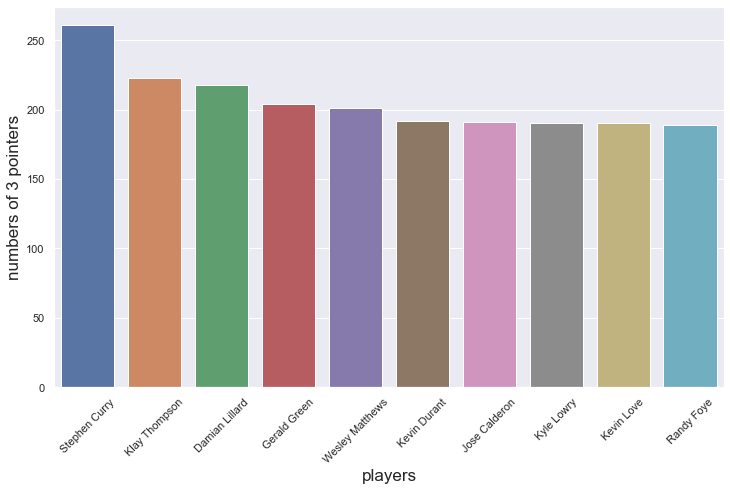

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(df_3_pointers["player"],df_3_pointers["x3p"])
plt.xticks(rotation=45)
plt.ylabel("numbers of 3 pointers",fontsize=17)
plt.xlabel("players",fontsize=17)

### players with best Effective Field Goal Percentage

In [18]:
df_egf=df[["efg.","player"]].sort_values(by="efg.",ascending=False)[:10]

In [19]:
df_egf

efg.           player
271  1.000  DeAndre Liggins
46   1.000  Andris Biedrins
54   0.750     Keith Bogans
209  0.736     Ryan Hollins
473  0.677   Brandan Wright
112  0.677     Troy Daniels
245  0.676   DeAndre Jordan
241  0.662      James Jones
352  0.659    Mason Plumlee
12   0.649   Chris Andersen

In [20]:
ft=df[["ft","player","fta"]].sort_values(by="ft",ascending=False)[:10]
ft

ft            player  fta
133  703      Kevin Durant  805
185  576      James Harden  665
277  520        Kevin Love  633
123  519     DeMar DeRozan  630
179  482     Blake Griffin  674
17   459   Carmelo Anthony  541
225  439      LeBron James  585
101  432  DeMarcus Cousins  595
162  401       Paul George  464
272  371    Damian Lillard  426

In [21]:
ft["total"]=ft["ft"]+ft["fta"]

Text(0.5, 0, 'players')

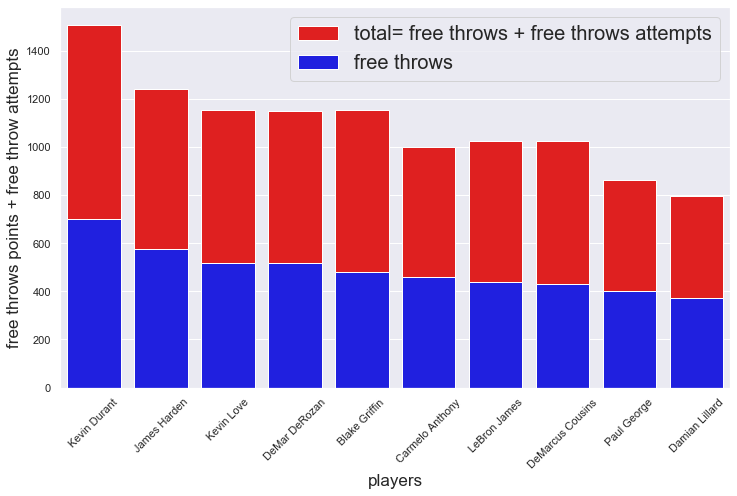

In [22]:
plt.figure(figsize=(12,7))
topplot=sns.barplot(x=ft["player"],y=ft["total"],color="red",label="total= free throws + free throws attempts")
bottomplot=sns.barplot(x=ft["player"],y=ft["ft"],color="blue",label="free throws")
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylabel("free throws points + free throw attempts",fontsize=17)
plt.xlabel("players",fontsize=17)

# data cleaning

In [23]:
df.drop(["player","bref_team_id","fg","fga","x3p","x3pa","ft","fta"],axis=1,inplace=True)

In [24]:
df.head()

pos  age   g  gs    mp    fg.      x3p.  x2p  x2pa      x2p.   efg.    ft.  \
0  SF   23  63   0   847  0.468  0.266667   62   126  0.492063  0.482  0.660   
1   C   20  81  20  1197  0.503       NaN   93   185  0.502703  0.503  0.581   
2  PF   27  53  12   961  0.520       NaN  143   275  0.520000  0.520  0.639   
3  SG   28  73  73  2552  0.459  0.426667  336   711  0.472574  0.522  0.815   
4   C   25  56  30   951  0.546  0.000000  136   248  0.548387  0.546  0.836   

   orb  drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0   72  144  216   28   23   26   30  122   171  2013-2014        2013  
1  142  190  332   43   40   57   71  203   265  2013-2014        2013  
2  102  204  306   38   24   36   39  108   362  2013-2014        2013  
3   32  230  262  248   35    3  146  136  1330  2013-2014        2013  
4   94  183  277   40   23   46   63  187   328  2013-2014        2013

In [25]:
df.drop(["season","season_end"],axis=1,inplace=True)

In [26]:
df.head()

pos  age   g  gs    mp    fg.      x3p.  x2p  x2pa      x2p.   efg.    ft.  \
0  SF   23  63   0   847  0.468  0.266667   62   126  0.492063  0.482  0.660   
1   C   20  81  20  1197  0.503       NaN   93   185  0.502703  0.503  0.581   
2  PF   27  53  12   961  0.520       NaN  143   275  0.520000  0.520  0.639   
3  SG   28  73  73  2552  0.459  0.426667  336   711  0.472574  0.522  0.815   
4   C   25  56  30   951  0.546  0.000000  136   248  0.548387  0.546  0.836   

   orb  drb  trb  ast  stl  blk  tov   pf   pts  
0   72  144  216   28   23   26   30  122   171  
1  142  190  332   43   40   57   71  203   265  
2  102  204  306   38   24   36   39  108   362  
3   32  230  262  248   35    3  146  136  1330  
4   94  183  277   40   23   46   63  187   328

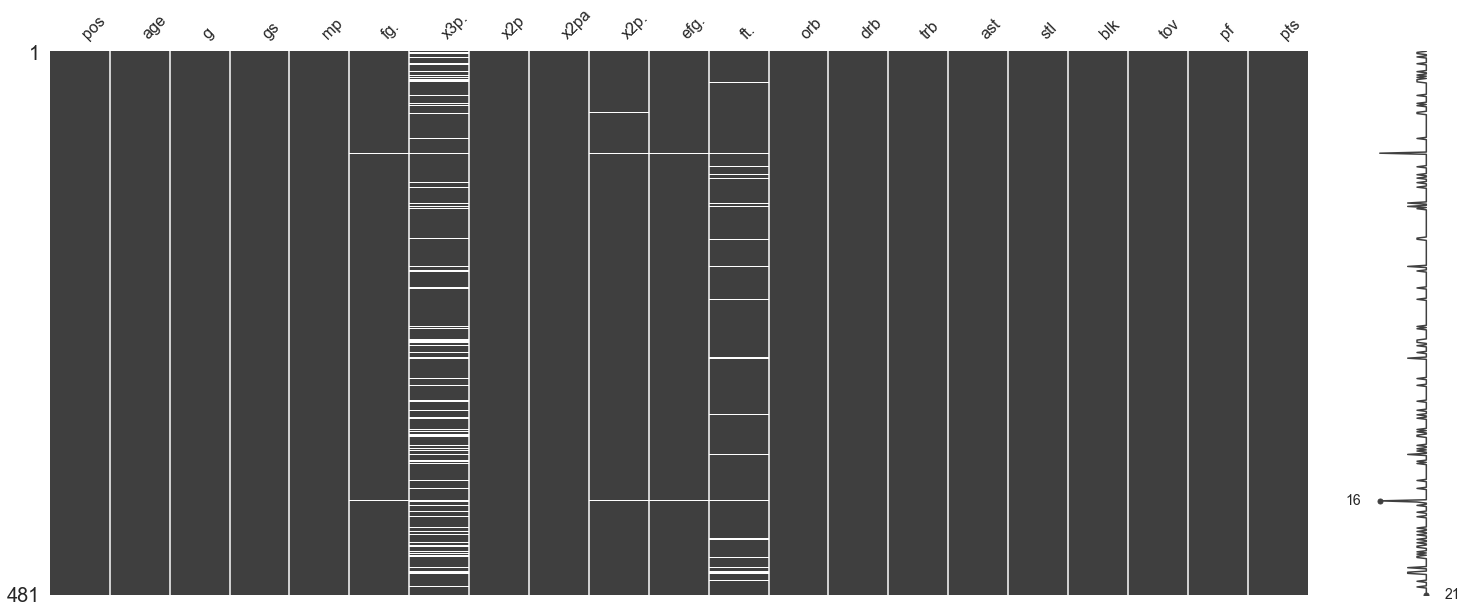

In [27]:
msn.matrix(df)

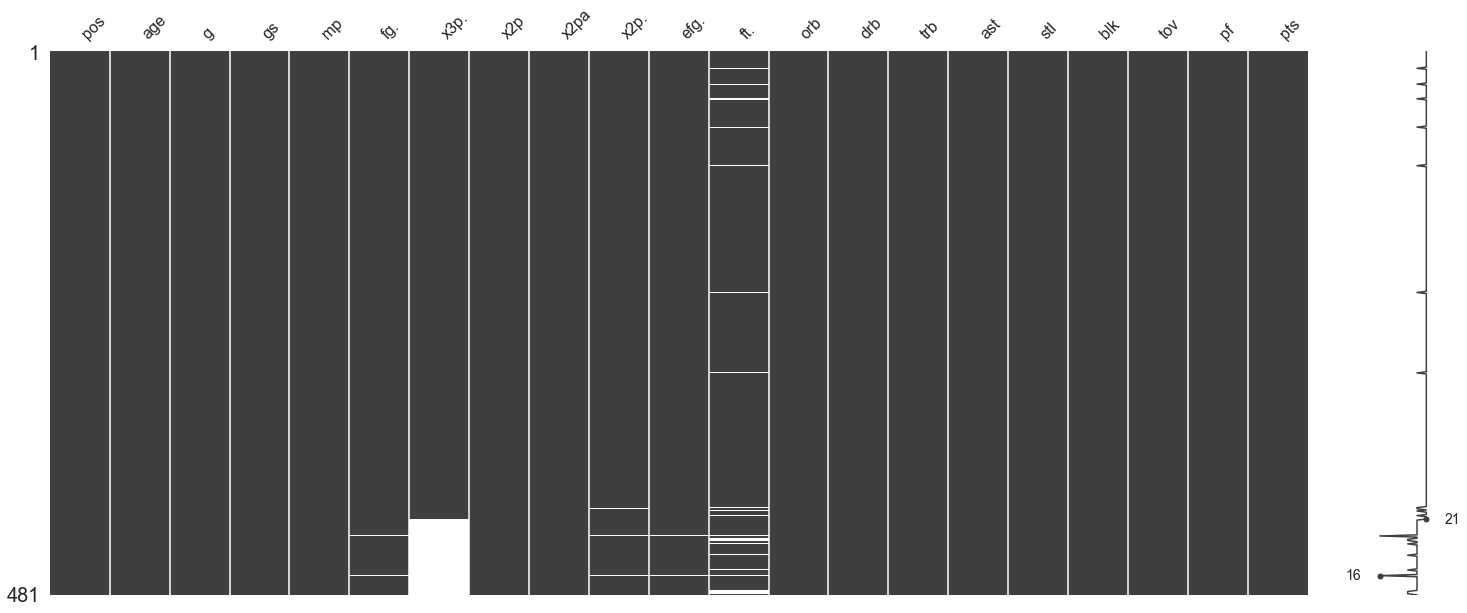

In [28]:
msn.matrix(df.sort_values("x3p."))

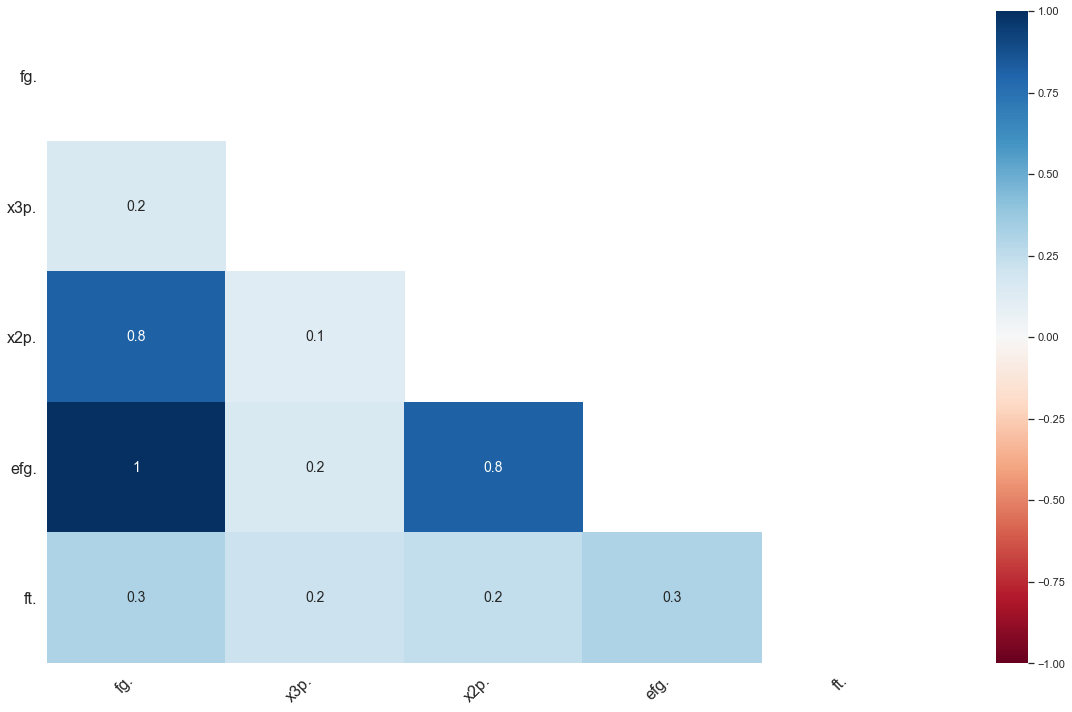

In [29]:
msn.heatmap(df)

In [30]:
df.drop(['x2p','x2pa'],axis=1,inplace=True)

In [31]:
df.head()

pos  age   g  gs    mp    fg.      x3p.      x2p.   efg.    ft.  orb  drb  \
0  SF   23  63   0   847  0.468  0.266667  0.492063  0.482  0.660   72  144   
1   C   20  81  20  1197  0.503       NaN  0.502703  0.503  0.581  142  190   
2  PF   27  53  12   961  0.520       NaN  0.520000  0.520  0.639  102  204   
3  SG   28  73  73  2552  0.459  0.426667  0.472574  0.522  0.815   32  230   
4   C   25  56  30   951  0.546  0.000000  0.548387  0.546  0.836   94  183   

   trb  ast  stl  blk  tov   pf   pts  
0  216   28   23   26   30  122   171  
1  332   43   40   57   71  203   265  
2  306   38   24   36   39  108   362  
3  262  248   35    3  146  136  1330  
4  277   40   23   46   63  187   328

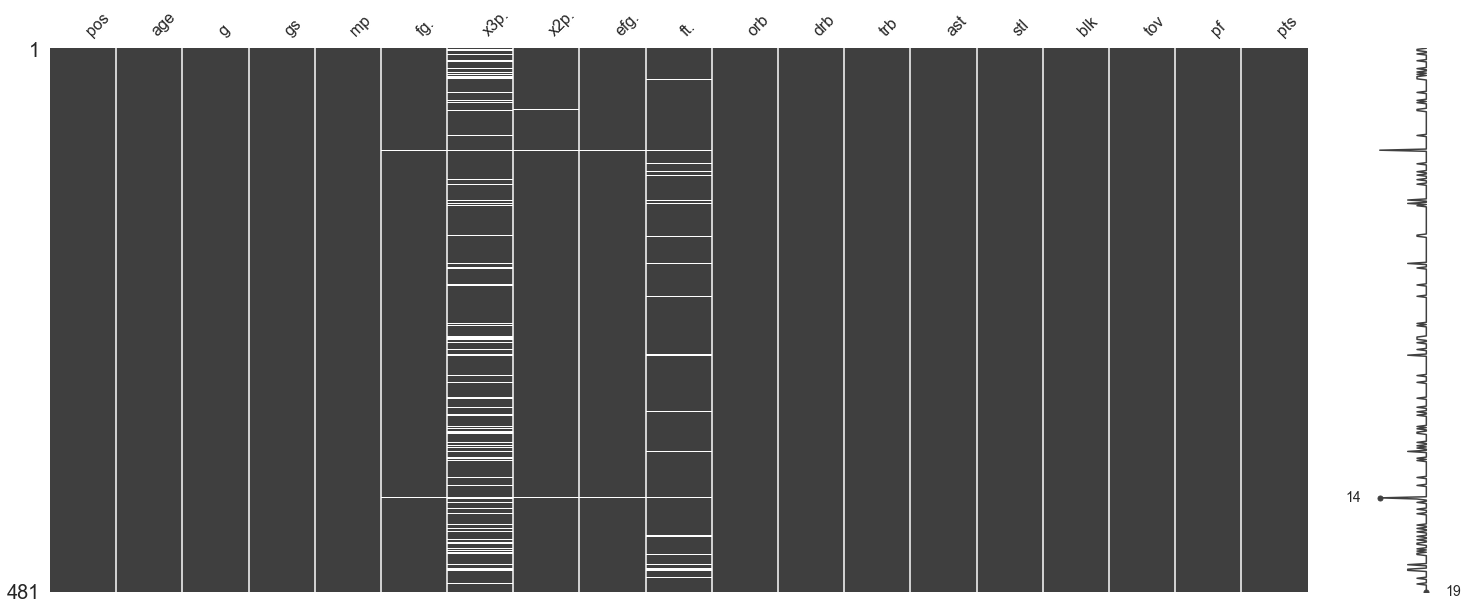

In [32]:
msn.matrix(df)

In [33]:
len(miss_1)

67

In [34]:
len(miss_2)

3

In [35]:
len(df[df["ft."].isnull()])

20

In [36]:
df.replace(np.nan,0,inplace=True)

the reason why i repaced remaining Nan values in dataset values with zero because they were missing because the corresponfing values they were depending on were zero(0) as for example 3 pointers of some players were zero because they did not take any 3 pointers attempt that's why their values was zero and because of this x3p. column has Nan values. Same goes for the x2p. and ft. coulmns

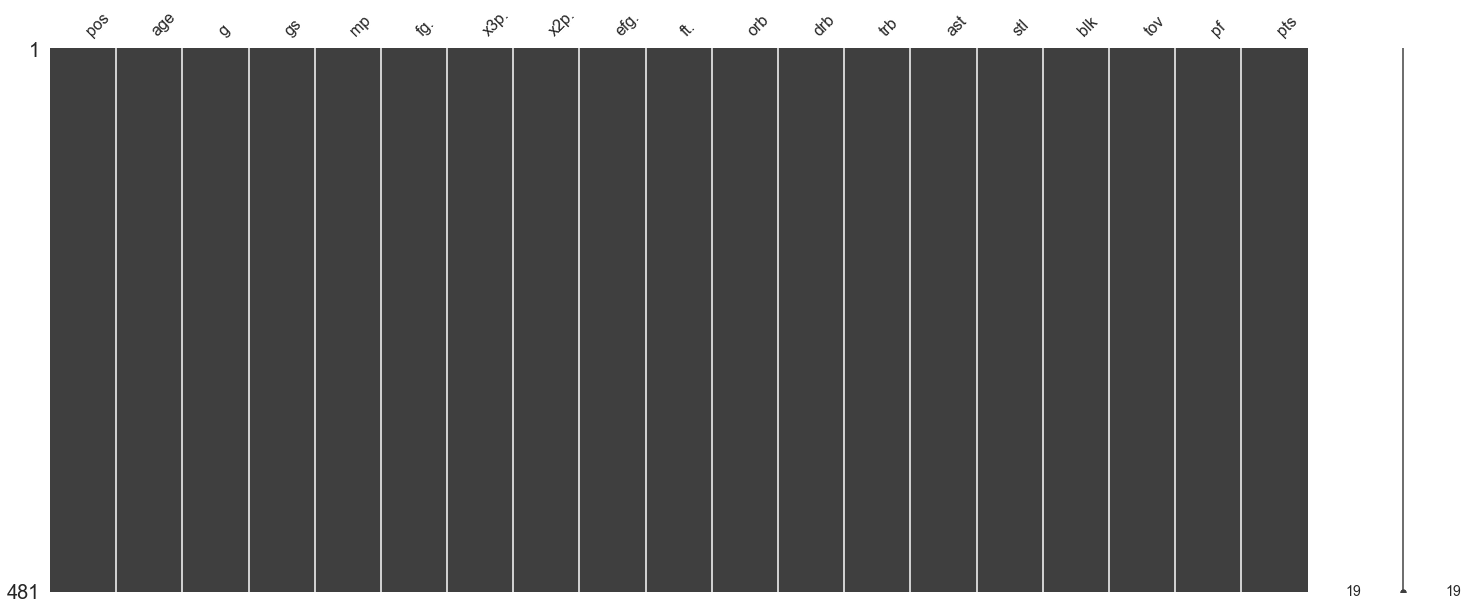

In [37]:
msn.matrix(df)

making dummy variable for the pos column

In [38]:
df1=pd.get_dummies(df["pos"],prefix="col",drop_first=True)

In [39]:
df1.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG
0      0      0       0       0       1       0
1      0      0       0       0       0       0
2      0      0       1       0       0       0
3      0      0       0       0       0       1
4      0      0       0       0       0       0

In [40]:
df=pd.concat([df1,df],axis=1)

In [41]:
df.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG pos  age   g  gs    mp    fg.  \
0      0      0       0       0       1       0  SF   23  63   0   847  0.468   
1      0      0       0       0       0       0   C   20  81  20  1197  0.503   
2      0      0       1       0       0       0  PF   27  53  12   961  0.520   
3      0      0       0       0       0       1  SG   28  73  73  2552  0.459   
4      0      0       0       0       0       0   C   25  56  30   951  0.546   

       x3p.      x2p.   efg.    ft.  orb  drb  trb  ast  stl  blk  tov   pf  \
0  0.266667  0.492063  0.482  0.660   72  144  216   28   23   26   30  122   
1  0.000000  0.502703  0.503  0.581  142  190  332   43   40   57   71  203   
2  0.000000  0.520000  0.520  0.639  102  204  306   38   24   36   39  108   
3  0.426667  0.472574  0.522  0.815   32  230  262  248   35    3  146  136   
4  0.000000  0.548387  0.546  0.836   94  183  277   40   23   46   63  187   

    pts  
0   171  
1   265  
2   362  
3  1330  
4   328

In [42]:
df.drop(["pos"],axis=1,inplace=True)

In [43]:
df.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG  age   g  gs    mp    fg.  \
0      0      0       0       0       1       0   23  63   0   847  0.468   
1      0      0       0       0       0       0   20  81  20  1197  0.503   
2      0      0       1       0       0       0   27  53  12   961  0.520   
3      0      0       0       0       0       1   28  73  73  2552  0.459   
4      0      0       0       0       0       0   25  56  30   951  0.546   

       x3p.      x2p.   efg.    ft.  orb  drb  trb  ast  stl  blk  tov   pf  \
0  0.266667  0.492063  0.482  0.660   72  144  216   28   23   26   30  122   
1  0.000000  0.502703  0.503  0.581  142  190  332   43   40   57   71  203   
2  0.000000  0.520000  0.520  0.639  102  204  306   38   24   36   39  108   
3  0.426667  0.472574  0.522  0.815   32  230  262  248   35    3  146  136   
4  0.000000  0.548387  0.546  0.836   94  183  277   40   23   46   63  187   

    pts  
0   171  
1   265  
2   362  
3  1330  
4   328

In [44]:
X=df.drop(["pts"],axis=1)

In [45]:
X.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG  age   g  gs    mp    fg.  \
0      0      0       0       0       1       0   23  63   0   847  0.468   
1      0      0       0       0       0       0   20  81  20  1197  0.503   
2      0      0       1       0       0       0   27  53  12   961  0.520   
3      0      0       0       0       0       1   28  73  73  2552  0.459   
4      0      0       0       0       0       0   25  56  30   951  0.546   

       x3p.      x2p.   efg.    ft.  orb  drb  trb  ast  stl  blk  tov   pf  
0  0.266667  0.492063  0.482  0.660   72  144  216   28   23   26   30  122  
1  0.000000  0.502703  0.503  0.581  142  190  332   43   40   57   71  203  
2  0.000000  0.520000  0.520  0.639  102  204  306   38   24   36   39  108  
3  0.426667  0.472574  0.522  0.815   32  230  262  248   35    3  146  136  
4  0.000000  0.548387  0.546  0.836   94  183  277   40   23   46   63  187

In [46]:
y=df["pts"]

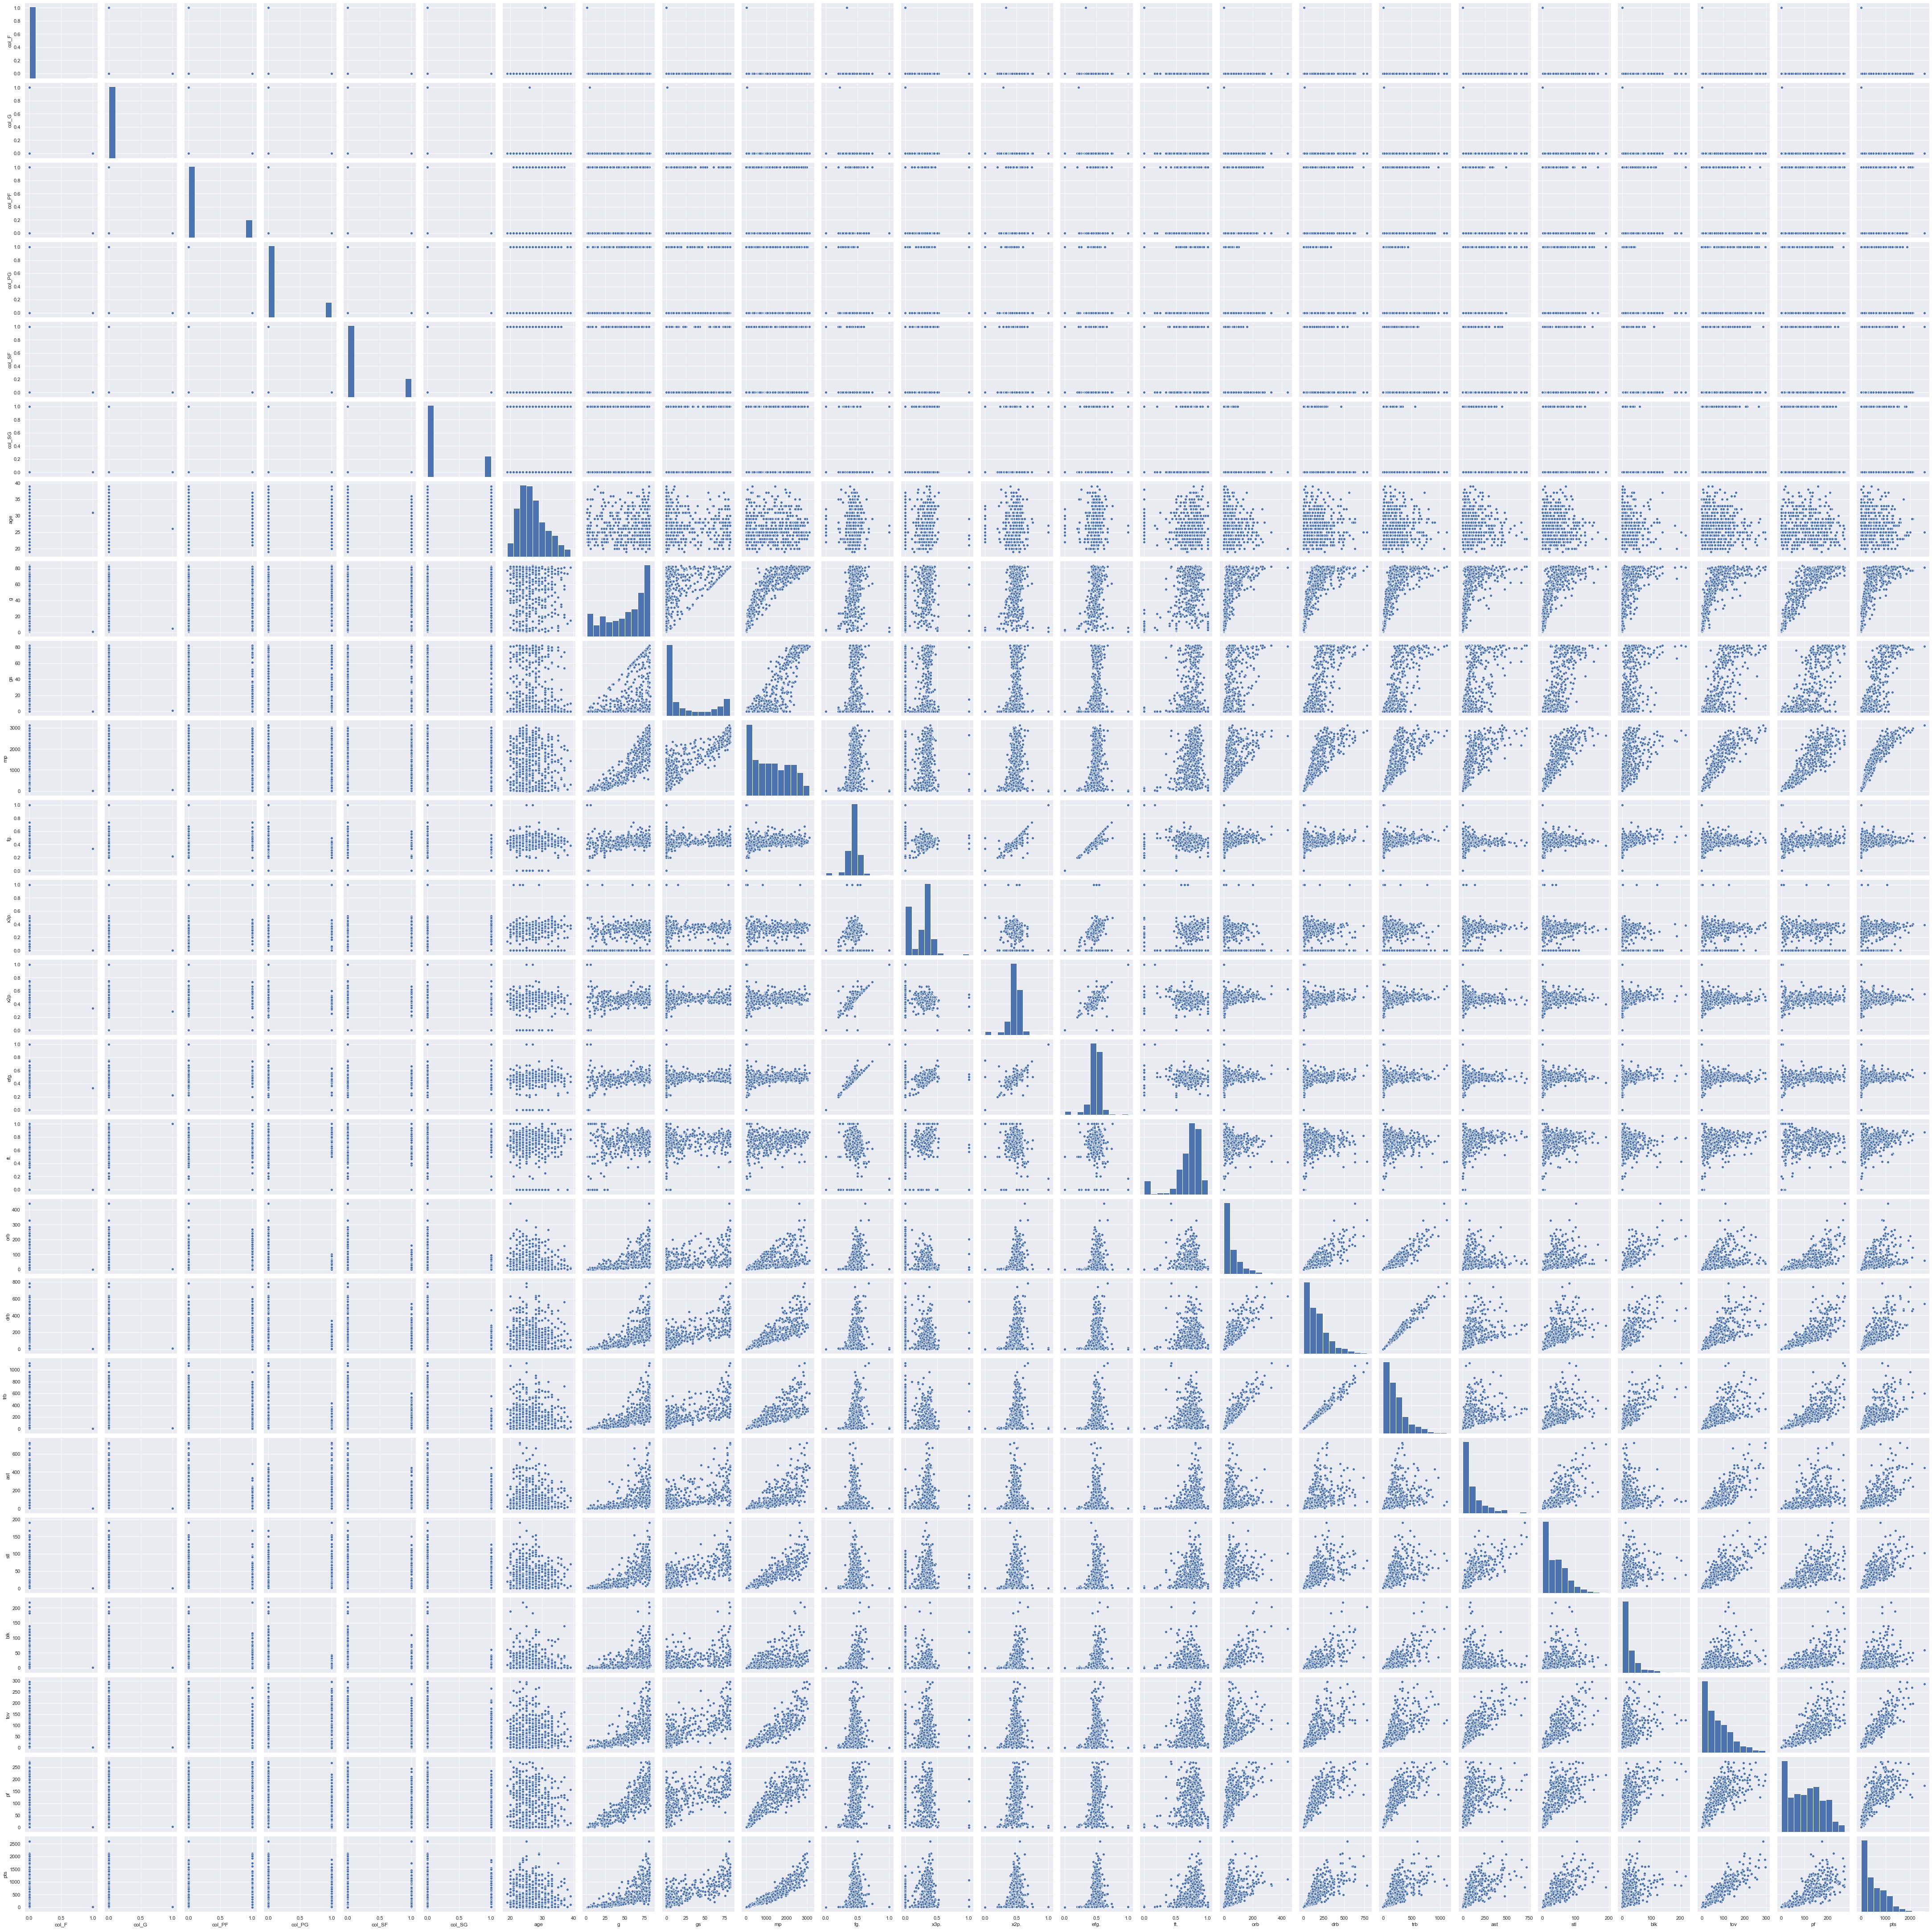

In [82]:
sns.pairplot(df)

In [78]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [48]:
std=StandardScaler()
X_scaled=std.fit_transform(X)

In [49]:
def vif_cal(data):
    vif = pd.DataFrame()
    vif["vif"] = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
    vif["Features"] = X.columns

#let's check the values
    return vif

In [50]:
vif_cal(X_scaled)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif Features
0    1.044809    col_F
1    1.058885    col_G
2    1.919035   col_PF
3    3.560202   col_PG
4    2.994110   col_SF
5    3.365354   col_SG
6    1.096469      age
7    7.528159        g
8    6.012634       gs
9   27.252235       mp
10  21.334721      fg.
11   2.741323     x3p.
12   4.401565     x2p.
13  16.455877     efg.
14   1.471882      ft.
15        inf      orb
16        inf      drb
17        inf      trb
18   7.923215      ast
19   4.869110      stl
20   3.263306      blk
21  11.617124      tov
22   9.322266       pf

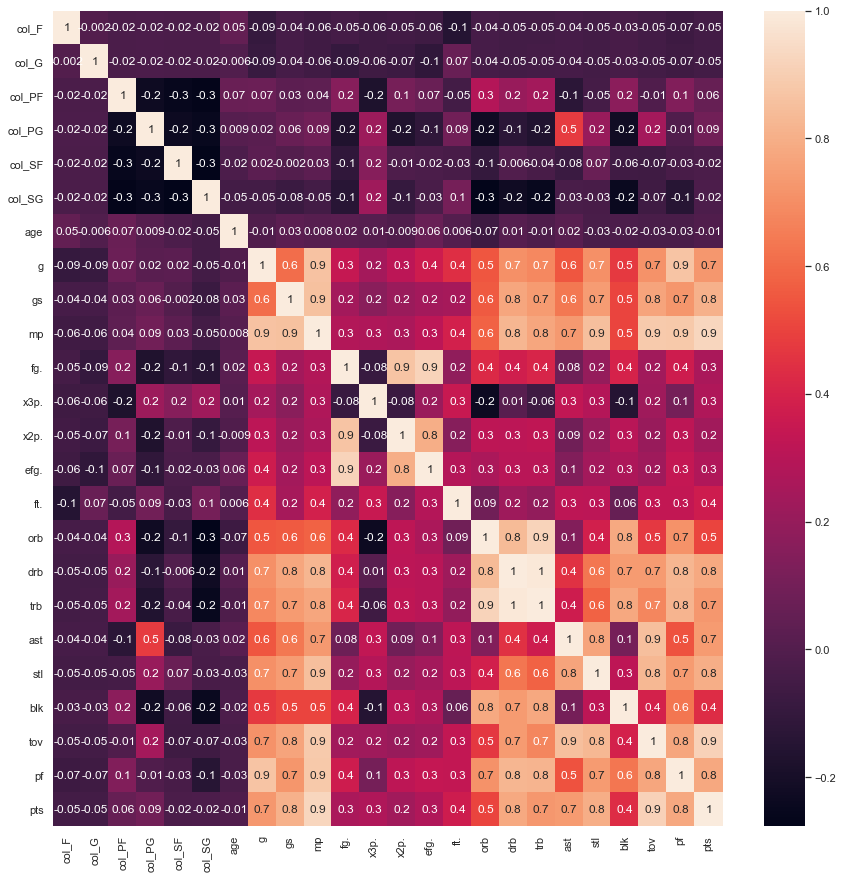

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.0g')

In [52]:
X_1=X.drop(["trb"],axis=1)
X_1.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG  age   g  gs    mp    fg.  \
0      0      0       0       0       1       0   23  63   0   847  0.468   
1      0      0       0       0       0       0   20  81  20  1197  0.503   
2      0      0       1       0       0       0   27  53  12   961  0.520   
3      0      0       0       0       0       1   28  73  73  2552  0.459   
4      0      0       0       0       0       0   25  56  30   951  0.546   

       x3p.      x2p.   efg.    ft.  orb  drb  ast  stl  blk  tov   pf  
0  0.266667  0.492063  0.482  0.660   72  144   28   23   26   30  122  
1  0.000000  0.502703  0.503  0.581  142  190   43   40   57   71  203  
2  0.000000  0.520000  0.520  0.639  102  204   38   24   36   39  108  
3  0.426667  0.472574  0.522  0.815   32  230  248   35    3  146  136  
4  0.000000  0.548387  0.546  0.836   94  183   40   23   46   63  187

In [53]:
x1_scaled=std.fit_transform(X_1)

In [54]:
X.drop(["trb"],inplace=True,axis=1)


In [55]:
vif_cal(x1_scaled)

vif Features
0    1.044809    col_F
1    1.058885    col_G
2    1.919035   col_PF
3    3.560202   col_PG
4    2.994110   col_SF
5    3.365354   col_SG
6    1.096469      age
7    7.528159        g
8    6.012634       gs
9   27.252235       mp
10  21.334721      fg.
11   2.741323     x3p.
12   4.401565     x2p.
13  16.455877     efg.
14   1.471882      ft.
15   6.691049      orb
16  11.228738      drb
17   7.923215      ast
18   4.869110      stl
19   3.263306      blk
20  11.617124      tov
21   9.322266       pf

In [56]:
X_1.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG  age   g  gs    mp    fg.  \
0      0      0       0       0       1       0   23  63   0   847  0.468   
1      0      0       0       0       0       0   20  81  20  1197  0.503   
2      0      0       1       0       0       0   27  53  12   961  0.520   
3      0      0       0       0       0       1   28  73  73  2552  0.459   
4      0      0       0       0       0       0   25  56  30   951  0.546   

       x3p.      x2p.   efg.    ft.  orb  drb  ast  stl  blk  tov   pf  
0  0.266667  0.492063  0.482  0.660   72  144   28   23   26   30  122  
1  0.000000  0.502703  0.503  0.581  142  190   43   40   57   71  203  
2  0.000000  0.520000  0.520  0.639  102  204   38   24   36   39  108  
3  0.426667  0.472574  0.522  0.815   32  230  248   35    3  146  136  
4  0.000000  0.548387  0.546  0.836   94  183   40   23   46   63  187

In [57]:
X_1=X_1.drop(['tov','mp'],axis=1)

In [58]:
X_1.head()

col_F  col_G  col_PF  col_PG  col_SF  col_SG  age   g  gs    fg.      x3p.  \
0      0      0       0       0       1       0   23  63   0  0.468  0.266667   
1      0      0       0       0       0       0   20  81  20  0.503  0.000000   
2      0      0       1       0       0       0   27  53  12  0.520  0.000000   
3      0      0       0       0       0       1   28  73  73  0.459  0.426667   
4      0      0       0       0       0       0   25  56  30  0.546  0.000000   

       x2p.   efg.    ft.  orb  drb  ast  stl  blk   pf  
0  0.492063  0.482  0.660   72  144   28   23   26  122  
1  0.502703  0.503  0.581  142  190   43   40   57  203  
2  0.520000  0.520  0.639  102  204   38   24   36  108  
3  0.472574  0.522  0.815   32  230  248   35    3  136  
4  0.548387  0.546  0.836   94  183   40   23   46  187

In [59]:
x1_scaled=std.fit_transform(X_1)

In [60]:
X.drop(['tov','mp'],axis=1,inplace=True)

In [61]:
vif_cal(x1_scaled)

vif Features
0    1.040571    col_F
1    1.055897    col_G
2    1.894069   col_PF
3    3.521149   col_PG
4    2.869187   col_SF
5    3.172468   col_SG
6    1.084207      age
7    5.230342        g
8    3.920520       gs
9   20.457862      fg.
10   2.705210     x3p.
11   4.397150     x2p.
12  15.708479     efg.
13   1.468466      ft.
14   6.624007      orb
15   8.995596      drb
16   4.441015      ast
17   4.711978      stl
18   3.245581      blk
19   7.990972       pf

In [62]:
X_1=X_1.drop(["efg."],axis=1)

In [63]:
x1_scaled=std.fit_transform(X_1)

In [64]:
X.drop(['efg.'],axis=1,inplace=True)

In [65]:
vif_cal(x1_scaled)

vif Features
0   1.040569    col_F
1   1.055749    col_G
2   1.890102   col_PF
3   3.497349   col_PG
4   2.779667   col_SF
5   3.100494   col_SG
6   1.056314      age
7   5.228739        g
8   3.911313       gs
9   5.044963      fg.
10  1.758902     x3p.
11  4.394322     x2p.
12  1.459798      ft.
13  6.583586      orb
14  8.993134      drb
15  4.408845      ast
16  4.701225      stl
17  3.212934      blk
18  7.952145       pf

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x1_scaled, y, test_size=0.25, random_state=101)

In [67]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [69]:
knn = KNeighborsRegressor()

In [70]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [71]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.770, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.856, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.834, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.817, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.847, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.769, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.866, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.776, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.813, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.817, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.866, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ..............

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [72]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [74]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [75]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [76]:
knn.score(X_train,y_train)

0.8517181446878406

In [77]:
knn.score(X_test,y_test)

0.754856786896345

In [79]:
y_pred=knn.predict(X_test)

In [80]:
r2_score(y_test,y_pred)

0.754856786896345